*Problem Statement 1 - Crime Rate*

## Importing the Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Datasets

In [34]:
crime_df = pd.read_csv("/content/crime_data.csv")
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [35]:
# Data Structure
type(crime_df)

pandas.core.frame.DataFrame

In [36]:
crime_df.shape

(50, 5)

In [37]:
crime_df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

Since there is no missing value and no requirement of encoding and the feature scaling

## Dependent Variable

In [38]:
X = crime_df.iloc[:,1:].values
X

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

## Build The Model

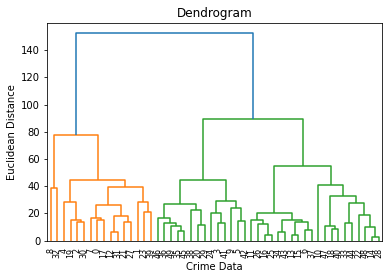

In [39]:
# Using the Dendogram to find the optimal no. of clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Crime Data')
plt.ylabel('Euclidean Distance')
plt.show()

From above Dendrogram, we can find that there are 2 optimal no. of clusters. 

In [40]:
#Fitting the Hierarchical Clustering  to the dataset  
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)
y_hc


array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

1st, 2nd, 3rd datapoints in dataset refers to second cluster, 4th, 5th datapoint refers to first cluster and so on ...

## Visualization 

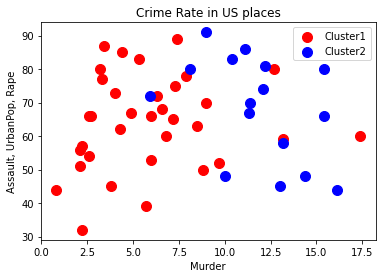

In [41]:
#Visualization the cluster
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,2], s=100,c = 'red', label = 'Cluster1')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,2], s=100,c = 'blue', label = 'Cluster2')
plt.title('Crime Rate in US places')
plt.xlabel('Murder')
plt.ylabel('Assault, UrbanPop, Rape')
plt.legend()
plt.show()

*Frome above Scatter plot, some inferences are*

1. Cluster 1 consits those places where Murder rate are lower and Assault, UrbanPop, Rape crime are on intermediate level. 

2. Cluster 2 consists those places of whose US where both Murder rate as well as other crime like Assault , UrbanPop & Rapes are on higher level. 

*Problem Statement - EastWest Airlines*

# Importing the Libraries 

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#Importing the Dataset

In [43]:
Airlines_data = pd.read_csv("/content/EastWestAirlines.csv")
Airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [44]:
Airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [45]:
# Checking or handling the missing values 

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
#imputer = imputer.fit(Airlines_data[:,1:11])
#Airlines_data[:,1:11] = imputer.transform(Airlines_data[:,1:11])


In [46]:
# Droping the columns
#Since ID and Award doesnot play an import role in making the clustering
Airlines_data1 = Airlines_data.drop(['ID#', 'Award?'], axis=1)
Airlines_data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [47]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
SC_Airlines_data1 = StandardScaler()
Airlines_data2 = SC_Airlines_data1.fit_transform(Airlines_data1)
Airlines_data2

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

## Method -1 Build The Model by K-means clustering

In [48]:
# using the Elbow Method to find the optimal no. of clusters. let no of cluster are 10

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++' , max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Airlines_data2)
    wcss.append(kmeans.inertia_)


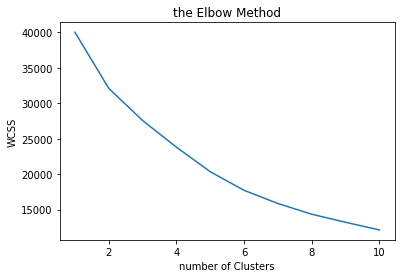

In [49]:
plt.plot(range(1,11), wcss)
plt.title("the Elbow Method")
plt.xlabel("number of Clusters")
plt.ylabel('WCSS')
plt.show()

In [50]:
# Fitting k-Means to the Dataset (from Fig. 6 is the best cluster no.)
kmeans = KMeans(n_clusters= 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Airlines_data2)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

##Visualization

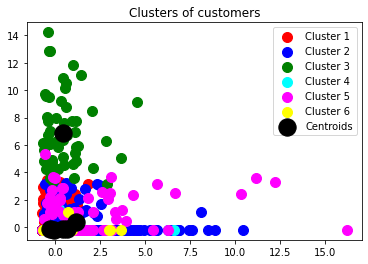

In [85]:
#Visualization the Cluster

plt.scatter(Airlines_data2[y_kmeans == 0, 0], Airlines_data2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Airlines_data2[y_kmeans == 1, 0], Airlines_data2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Airlines_data2[y_kmeans == 2, 0], Airlines_data2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Airlines_data2[y_kmeans == 3, 0], Airlines_data2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(Airlines_data2[y_kmeans == 4, 0], Airlines_data2[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(Airlines_data2[y_kmeans == 5, 0], Airlines_data2[y_kmeans == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

# Method -2  Build the Model by Hierarichal Clustering

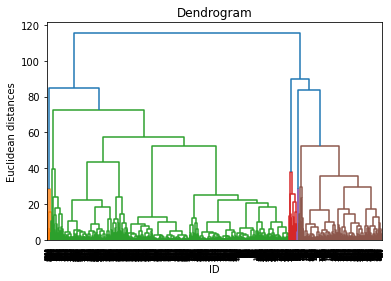

In [52]:
# using the Dendrogram to find teh optimal no. of clusters
import scipy.cluster.hierarchy as sch 
dendrogram = sch.dendrogram(sch.linkage(Airlines_data2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('ID')
plt.ylabel('Euclidean distances')
plt.show()

In [53]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(Airlines_data2)

In [54]:
y_hc

array([1, 1, 1, ..., 1, 1, 1])

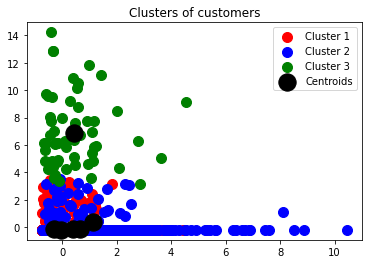

In [84]:
#Visualization

plt.scatter(Airlines_data2[y_kmeans == 0, 0], Airlines_data2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Airlines_data2[y_kmeans == 1, 0], Airlines_data2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Airlines_data2[y_kmeans == 2, 0], Airlines_data2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

## Method - 3 Build the Model by  DBSCAN

In [56]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("/content/EastWestAirlines.csv")
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [58]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [69]:
# Droping the columns
#Since ID and Award doesnot play an import role in making the clustering
Airlines_data3 = Airlines_data.drop(['ID#', 'Award?'], axis=1)
Airlines_data3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [75]:
array=Airlines_data3.values
array

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]])

In [76]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [77]:
dbscan = DBSCAN(eps=3, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=3, min_samples=6)

In [78]:
# Noisy Samples are given the label -1
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
c1=pd.DataFrame(dbscan.labels_,columns=["cluster"])
c1

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [80]:
clustered = pd.concat([df,c1],axis=1)

In [81]:
clustered[clustered['cluster']==-1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1
126,129,602064,0,5,1,1,194753,26,2250,10,7652,1,-1
151,154,930410,0,5,1,1,211284,18,2250,6,7640,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,-1
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,-1
3788,3811,374613,0,1,2,1,23592,31,5000,14,3463,1,-1
3846,3869,97510,1678,5,1,1,71609,51,7650,26,1665,1,-1


In [82]:
clustered

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [83]:
clustered.mean()

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
cluster                 -0.000250
dtype: float64